<a href="https://colab.research.google.com/github/crazie-programmer/Mental-Fitness-Tracker/blob/main/Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING MODULES**

In [ ]:
import warnings #warnings module is imported to avoid unnecessary warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np #numpy guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.
import pandas as pd # pandas provides streamlined alignment of tabular data and powerful time series functionality.
import seaborn as sns # Seaborn is an amazing visualization library for statistical graphics and provides beautiful default styles and color palettes to make statistical plots more attractive.
import matplotlib.pyplot as plt #Matplotlib is a cross-platform, data visualization and graphical plotting library (histograms, scatter plots, bar charts, etc) for Python.
import plotly.express as px #Plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks.

## **Calling data**

In [ ]:
# # Mounting Drive to get data from drive

# from google.colab import drive # Module to mount the Google Drive at the [/content/drive] directory within the Colab environment.
# drive.mount('/content/drive', force_remount=True)

In [ ]:
#Upload kaggle files by using API token to interact with Kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"alishapalbabu","key":"bbf1ae5c415e39f02a832c555ad89125"}'}

In [ ]:
#Series of commands to set-up for download
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 69 Jul 23 13:46 kaggle.json
/content


In [ ]:
#giving rw access (if 401-nathorized)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Check the list of datasets we can access
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset        Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           4759        197  1.0              
nelgiriyewithana/countries-of-the-world-2023                    Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33           3532        131  1.0              
arnavsmayan/netflix-userbase-dataset                            Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41           4742         94  1.0              
byomokeshsenapati/spotify-song-attributes                   

In [ ]:
#Download data command
!kaggle datasets download -d programmerrdai/mental-health-dataset/
!unzip /content/mental-health-dataset.zip

mental-health-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/mental-health-dataset.zip
replace mental-and-substance-use-as-share-of-disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mental-and-substance-use-as-share-of-disease.csv  
replace prevalence-by-mental-and-substance-use-disorder.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: prevalence-by-mental-and-substance-use-disorder.csv  
replace prevalence-of-depression-males-vs-females.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace prevalence-of-depression-males-vs-females.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace prevalence-of-depression-males-vs-females.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: prevalence-of-depression-males-vs-females.csv  
  inflating: share-with-depression.csv  
  inflating: share-with-mental-and-substance-disorders.csv  
  inflatin

## **Working with data**

In [ ]:
df1 = pd.read_csv("/content/prevalence-by-mental-and-substance-use-disorder.csv") #Dataset 1
df2 = pd.read_csv("/content/mental-and-substance-use-as-share-of-disease.csv") #Dataset 2

In [ ]:
df1.head() #Preview of dataset 1 with the size


,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
df1.shape #Dimension of the dataset 1

(6840, 10)

In [ ]:
df2.head() #Preview of dataset 2 with the size


,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [ ]:
df2.shape #Dimension of the dataset 2

(6840, 4)

In [ ]:
mdf = pd.merge(df1,df2) #merge dataset 1 and dataset 2 for better preview
mdf

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


## **Data cleansing**

In [ ]:
mdf.isnull().sum() #Identifying the null values or the missing values

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
mdf.drop(columns="Code",inplace= True) #dropping the column(s) that contain empty cells or missing data
mdf

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


In [ ]:
mdf.set_axis(['Country','Year','Schizophrenia','Bipolar','Eating','Anxiety','Drug','Depressive','Alcohol','Mental'],axis="columns",inplace=True)
mdf # renaming attributes for better and easier understanding of data and displaying its first 5 values

,Country,Year,Schizophrenia,Bipolar,Eating,Anxiety,Drug,Depressive,Alcohol,Mental
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


## **Visualization**

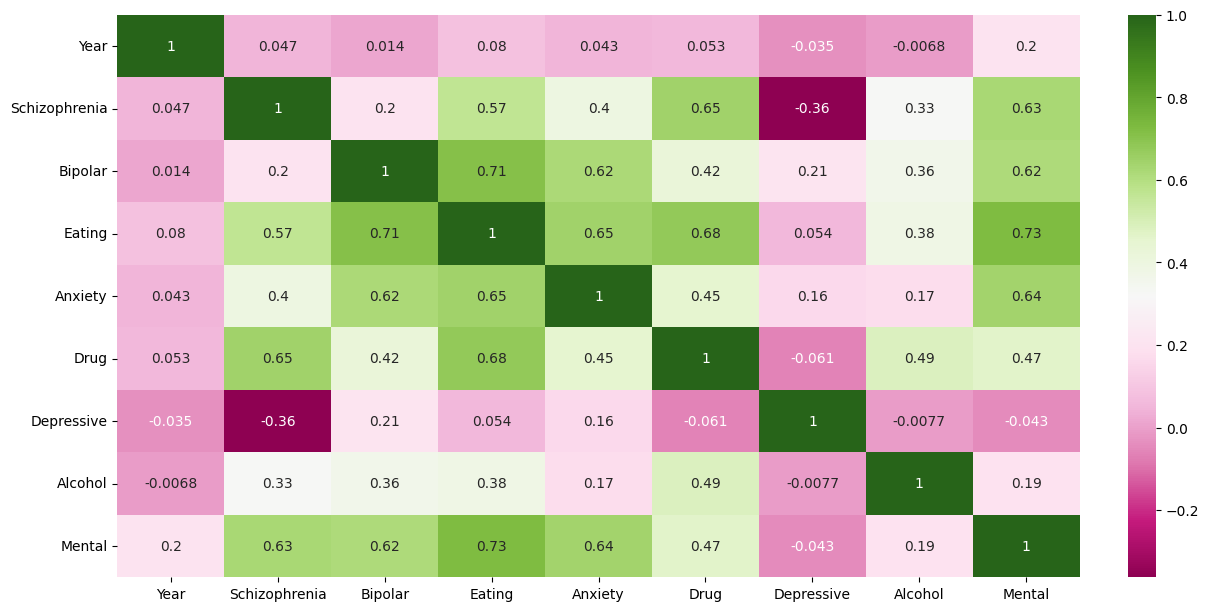

In [ ]:
# ploting heatmap using seaborn
plt.figure(layout="compressed",figsize=(12,6))
sns.heatmap(mdf.corr(),annot=True,cmap='PiYG')
plt.show()

In [ ]:
# ploting pairplot using seaborn
plt.figure(layout="compressed")
sns.pairplot(mdf,corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# mean values of Mental disorder Data
mean=mdf["Mental"].mean()
mean

In [ ]:
# ploting pie chart using plotly
fig=px.pie(mdf,values="Mental",names="Year")
fig.show()

In [ ]:
# ploting line chart using plotly
fig=px.line(mdf,x="Year",y="Mental",color="Country",markers=True,template="plotly_dark")
fig.show()

In [ ]:
# copying merged data to another variable to perform operation
df=mdf
df.info() #Display the data information

In [ ]:
# reformatting the data checking up for invalid datatypes to avoid errors while evaluation
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
  if df[i].dtype=="object":
    df[i]=l.fit_transform(df[i])
df.info()

In [ ]:
# spliting the data into train:test::.80:.20
x = df.drop("Mental", axis = 1) # x contains the data without the Mental column
y = df["Mental"]  # y contains just the Mental column

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .20, random_state=2) # both x and y is divided into .80 and .20 parts for train and test
# printing the splitted data [train dataset and test dataset]
print(f'xtrain data size: {xtrain.shape}, xtest data size: {xtest.shape}')
print(f"ytrain data size: {ytrain.shape}, ytest data size: {ytest.shape}")

## **Model Training**

In [ ]:
# Performing Linear Regression Model on the train dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred_lr = lr.predict(xtrain)
mse_lr = mean_squared_error(ytrain, ytrain_pred_lr)
rmse_lr = (np.sqrt(mse_lr))
r2_lr = r2_score(ytrain, ytrain_pred_lr)

print("Performing Linear Regression Model")
print("----------------------------------")
print(f"Mean Square Error: {mse_lr}")
print(f"Root Mean Square Error: {rmse_lr}")
print(f"R2 Score of the model: {r2_lr}")

In [ ]:
# Performing Random Forest Resgression Model on the train dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

ytrain_pred_rf = rf.predict(xtrain)
mse_rf = mean_squared_error(ytrain, ytrain_pred_rf)
rmse_rf = (np.sqrt(mse_rf))
r2_rf = r2_score(ytrain, ytrain_pred_rf)

print("Performing Random Forest Regression Model")
print("-----------------------------------------")
print(f"Mean Square Error: {mse_rf}")
print(f"Root Mean Square Error: {rmse_rf}")
print(f"R2 Score of the model: {r2_rf}")

In [ ]:
# Performing Linear Regression Model on the test dataset
ytest_pred_lr = lr.predict(xtest)
mse_lr = mean_squared_error(ytest, ytest_pred_lr)
rmse_lr = (np.sqrt(mse_lr))
r2_lr = r2_score(ytest, ytest_pred_lr)

print("Performing Linear Regression Model")
print("----------------------------------")
print(f"Mean Square Error: {mse_lr}")
print(f"Root Mean Square Error: {rmse_lr}")
print(f"R2 Score of the model: {r2_lr}")
print('\n\n')

# Random Forest Regression Model on the test dataset
ytest_pred_rf = rf.predict(xtest)
mse_rf = mean_squared_error(ytest, ytest_pred_rf)
rmse_rf = (np.sqrt(mse_rf))
r2_rf = r2_score(ytest, ytest_pred_rf)

print("Performing Random Forest Regression Model")
print("-----------------------------------------")
print(f"Mean Square Error: {mse_rf}")
print(f"Root Mean Square Error: {rmse_rf}")
print(f"R2 Score of the model: {r2_rf}")